In [ ]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch.git


fatal: destination path 'deep-learning-from-scratch' already exists and is not an empty directory.


In [ ]:
from deep_learning_scratch.dataset import mnist
(x_train,t_train),(x_test,t_test) = mnist.load_mnist(normalize=False,one_hot_label=False)
print(x_train.shape)

(60000, 784)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
#パーセプトロンの実装（単純な論理回路）
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1        

In [ ]:
#XORの実装
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
print(XOR(1,0))

1


In [ ]:
x = np.array([1,1,0,0,-1])
print(x > 0)

[ True  True False False False]


In [ ]:
#活性化関数の定義
def step_function(x):
    return np.array(x > 0, dtype=np.int)
    
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))       

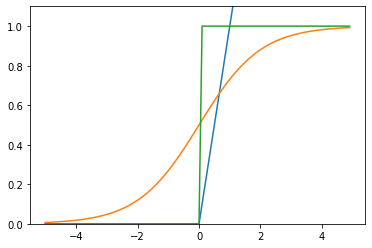

In [ ]:
#描画
x = np.arange(-5.0, 5.0, 0.1)
y1 = relu(x)
y2 = sigmoid(x)
y3 = step_function(x)
plt.plot(x, y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.ylim(0.0, 1.1)
plt.show()


In [ ]:
#Softmax関数（次回やります）
def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

In [ ]:
#３層ニューラルネットワークの実装
def init_network():
    with open("/content/deep_learning_scratch/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [ ]:
#実際に予測してみる
x = x_train[0]

t = t_train[0]
simplenet = init_network()
y = predict(simplenet,x)
p = np.argmax(y)

print(p)
print(t)

5
5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
